In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
import warnings
warnings.filterwarnings("ignore")
import jieba
import numpy
import codecs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(10.0,5.0)
from wordcloud import WordCloud

In [9]:
df = pd.read_csv("./data/entertainment_news.csv", encoding='utf-8')
df = df.dropna()
content=df.content.values.tolist()
#jieba.load_userdict(u"data/user_dic.txt")
segment=[]
for line in content:
    try:
        segs=jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\vivi\AppData\Local\Temp\jieba.cache
Loading model cost 1.285 seconds.
Prefix dict has been built successfully.


In [11]:
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

In [17]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg(numpy.size) #words_stat--> Series
words_stat=words_stat.to_frame()
words_stat.columns=['计数']
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

,segment,计数
60814,电影,10230
73268,观众,5574
8618,中国,5476
70484,节目,4398
33626,导演,4197


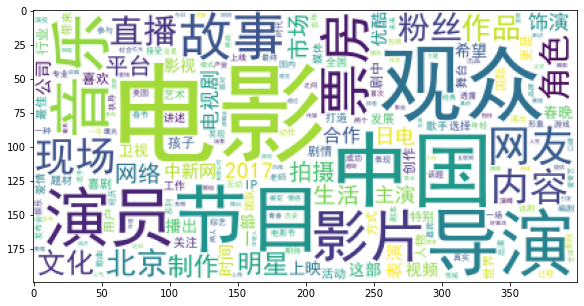

In [18]:
wordcloud=WordCloud(font_path="data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)